## COM-480 | Project of Data Visualization

Team: "no preference"

Member: Ulysse Widmer, Jack Lau, Luis Busta

Topic: Player engagement with respect to game genres on Steam public data

## Dataset

#### Dataset on Kaggle
* [Steam video games](https://www.kaggle.com/datasets/tamber/steam-video-games)
* [Steam store games](https://www.kaggle.com/datasets/nikdavis/steam-store-games)
* [Steam player data](https://www.kaggle.com/datasets/jackogozaly/steam-player-data)
* [Steam games complete dataset](https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset)
* [Steam dataset](https://www.kaggle.com/datasets/souyama/steam-dataset)
* [Historical player count](https://data.mendeley.com/datasets/ycy3sy3vj2/1)
#### Web api
* [Steam web api from valve](https://developer.valvesoftware.com/wiki/Steam_Web_API) | 
[(It is not possible to get historical data for steam web api)](https://stackoverflow.com/questions/45983820/steam-api-get-historical-player-count-of-specific-game)

In [115]:
# import all the library needed
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import re

sns.set_style("whitegrid")

# all game list => http://api.steampowered.com/ISteamApps/GetAppList/v2
# current player list => http://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid={}
# get global stats for game => http://api.steampowered.com/ISteamUserStats/GetGlobalStatsForGame/v0001/?appid={}
#! We can't get historical data from steam web api, but we can get the current player of different genre

games = requests.get("https://steamspy.com/api.php?request=all")

In [116]:
df = {
    "game_id":[],
    "genres":[],
    "players":[]
}

counter = 0

for name, value in games.json().items():
    df['game_id'].append(name)
    df['players'].append(value['average_2weeks'])
    df['genres'].append(value['genre'])

df = pd.DataFrame(df)
df.head()

KeyError: 'genre'

## Visualization

In [99]:
print(df)
df = pd.DataFrame(df)

{'game_id': ['1748230', '1748300', '1748390', '1747670', '1747690', '1747830', '1747890', '1748050', '1747650', '1747050', '1745690', '1742470', '1741400', '1740730', '1740930', '1740000', '1740070', '1740150', '1739530', '1739880', '1739970', '1736260', '1736400', '1736450', '1735950', '1735160', '1735300', '1734280', '1734320', '1734390', '1733620', '1733880'], 'genres': ['Adventure', 'Casual', 'Action', 'Casual', 'Adventure', 'Action', 'Adventure', 'Casual', 'Action', 'Adventure', 'Free to Play', 'Casual', 'Indie', 'Action', 'Action', 'Action', 'Indie', 'Action', 'Adventure', 'Action', 'Adventure', 'Casual', 'Casual', 'Simulation', 'Adventure', 'Action', 'Utilities', 'Casual', 'Action', 'RPG', 'Action', 'Action'], 'players': [1, 6, 4, 1, 1, 1, 1, 1, 9, 8, 1, 2, 21, 1, 6, 1, 2, 2, 1, 1, 3, 1, 1, 3, 11, 1, 1, 1, 28, 3, 2, 3]}


In [100]:
plot_df = df.copy()
plot_df = plot_df.groupby(['genres']).sum().sort_values('players', ascending=False)
plot_df

,players
genres,
Action,59
Adventure,26
Indie,23
Casual,13
RPG,3
Simulation,3
Free to Play,1
Utilities,1


<AxesSubplot:xlabel='players', ylabel='genres'>

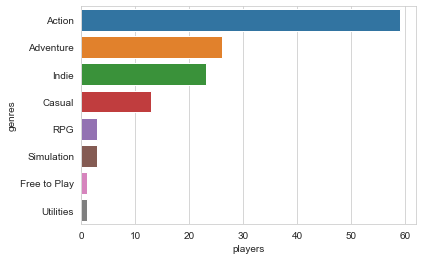

In [101]:
sns.barplot(x=plot_df.players , y=plot_df.index, errorbar=None)